<a href="https://colab.research.google.com/github/graccelle/Project/blob/master/Stripe_PhD_DS_TakeHome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please develop a quantitative approach which identifies a list of users for a sales or marketing campaign.

In [1]:
#Data load and manipulation libraries
import os
import requests as re
import zipfile as zp
from io import BytesIO

import warnings
warnings.filterwarnings('ignore')
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

#Data processing libraries
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

In [64]:
merchant_df = pd.read_excel("/content/dstakehome_merchants.xlsx")

payment_df = pd.read_excel("/content/dstakehome_payments.xlsx")

In [65]:
merchant_df.head()

,merchant,industry,first_charge_date,country,business_size
0,5d03e714,Education,2032-02-13 00:00:00+00:00,US,medium
1,da22f154,Others,2031-10-16 00:00:00+00:00,US,small
2,687eebc8,Software,2032-07-23 00:00:00+00:00,US,small
3,de478470,Software,2033-03-15 00:00:00+00:00,US,small
4,1e719b8a,Business services,2035-02-12 00:00:00+00:00,IT,small


In [66]:
payment_df.head()

,date,merchant,subscription_volume,checkout_volume,payment_link_volume,total_volume
0,2041-05-01T00:00:00Z,5d03e714,0,0,0,425340
1,2041-05-01T00:00:00Z,da22f154,0,0,0,17326
2,2041-05-01T00:00:00Z,687eebc8,79400,0,0,79400
3,2041-05-01T00:00:00Z,de478470,268400,0,0,268400
4,2041-05-01T00:00:00Z,1e719b8a,0,19895,0,19895


In [68]:
merchant_df.describe()

,merchant,industry,first_charge_date,country,business_size
count,23627,23627,23627,23627,23627
unique,23620,30,2872,44,3
top,0,Business services,2042-01-25 00:00:00+00:00,US,small
freq,8,3144,43,8595,22853


## **Exploratory Data Analysis on Merchant Data Set**

**Distribution plot for each Business Size, Industry and Country**

business_size
small     0.967241
medium    0.026326
large     0.006433
Name: proportion, dtype: float64

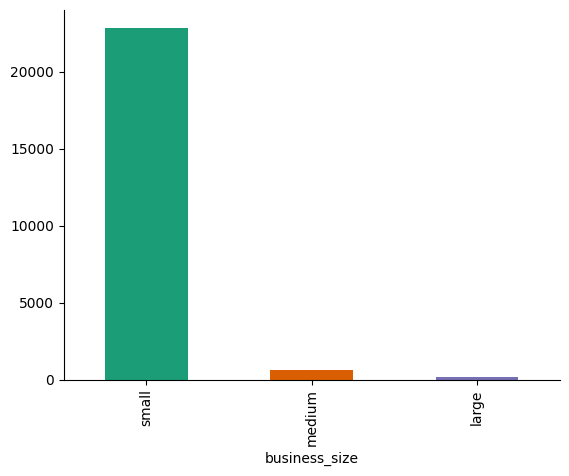

In [14]:
#Plot the unique types of business size and counts
merchant_df["business_size"].value_counts().plot(kind="bar", color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False);

#To display the proportion of business size counts
merchant_df["business_size"].value_counts(normalize=True)

country
US    0.363779
GB    0.147204
FR    0.071952
AU    0.058323
CA    0.056038
ES    0.039192
IT    0.034748
JP    0.024548
DE    0.021459
IE    0.018115
MX    0.014941
IN    0.014094
CH    0.012782
NZ    0.010496
HK    0.008803
SG    0.008507
NL    0.008296
BE    0.007788
BR    0.006603
SE    0.006391
AT    0.006052
MY    0.005375
NO    0.005206
PT    0.004994
AE    0.004867
DK    0.004825
PL    0.004359
RO    0.003978
SI    0.002963
CZ    0.002836
EE    0.002751
SK    0.002539
BG    0.002201
LT    0.002159
FI    0.002116
GR    0.001862
LV    0.001820
HU    0.001566
LU    0.001143
CY    0.001100
MT    0.000846
HR    0.000296
TH    0.000042
GI    0.000042
Name: proportion, dtype: float64

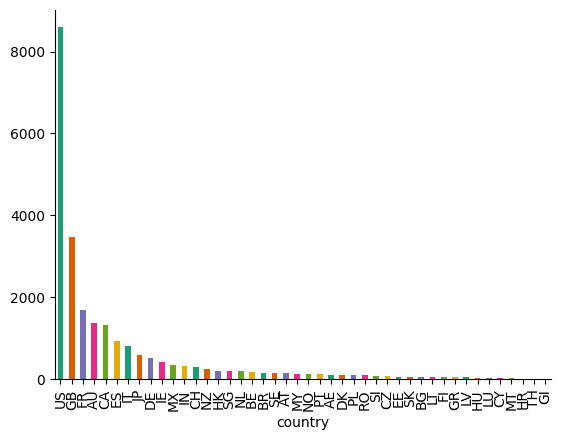

In [13]:
#Plot the unique types of country and counts
merchant_df["country"].value_counts().plot(kind="bar", color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False);

#To display the proportion of country counts
merchant_df["country"].value_counts(normalize=True)

industry
Business services                                           0.133068
Software                                                    0.091717
Merchandise                                                 0.084141
Personal services                                           0.081348
Others                                                      0.073306
Digital goods                                               0.058365
Education                                                   0.056376
Clothing & accessory                                        0.055149
Food & drink                                                0.053964
Grocery & food stores                                       0.033013
Religion, politics & other memberships                      0.032251
Travel & lodging                                            0.030770
Leisure                                                     0.023448
Art & photography                                           0.021501
Charity                  

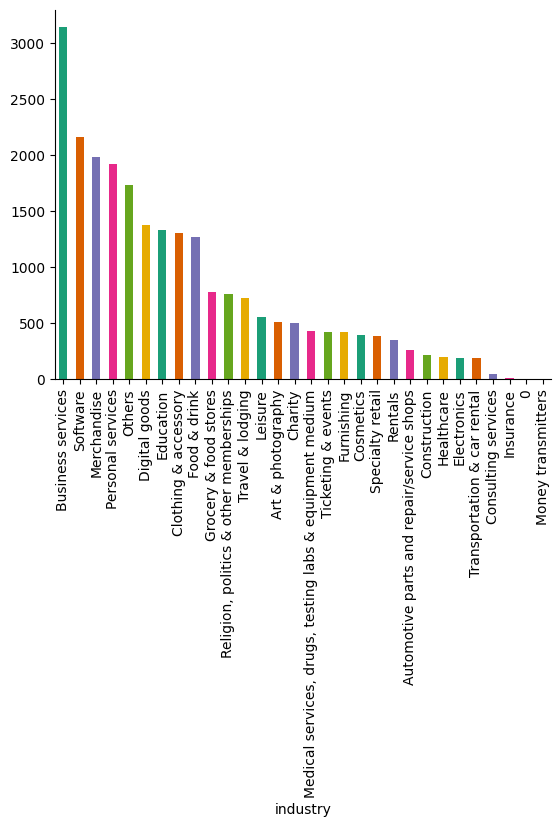

In [12]:
#Plot the unique types of industry and counts
merchant_df["industry"].value_counts().plot(kind="bar", color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False);

#To display the proportion of industry types
merchant_df["industry"].value_counts(normalize=True)

# **Exploring top 5 and bottom 5 countries**

**Top Countries**
*   US    0.363779
*   GB    0.147204
*   FR    0.071952
*   AU    0.058323
*   CA    0.056038

**Bottom Countries**
*   CY    0.001100
*   MT    0.000846
*   HR    0.000296
*   TH    0.000042
*   GI    0.000042

# **Exploration of top and bottom countries based on industry**

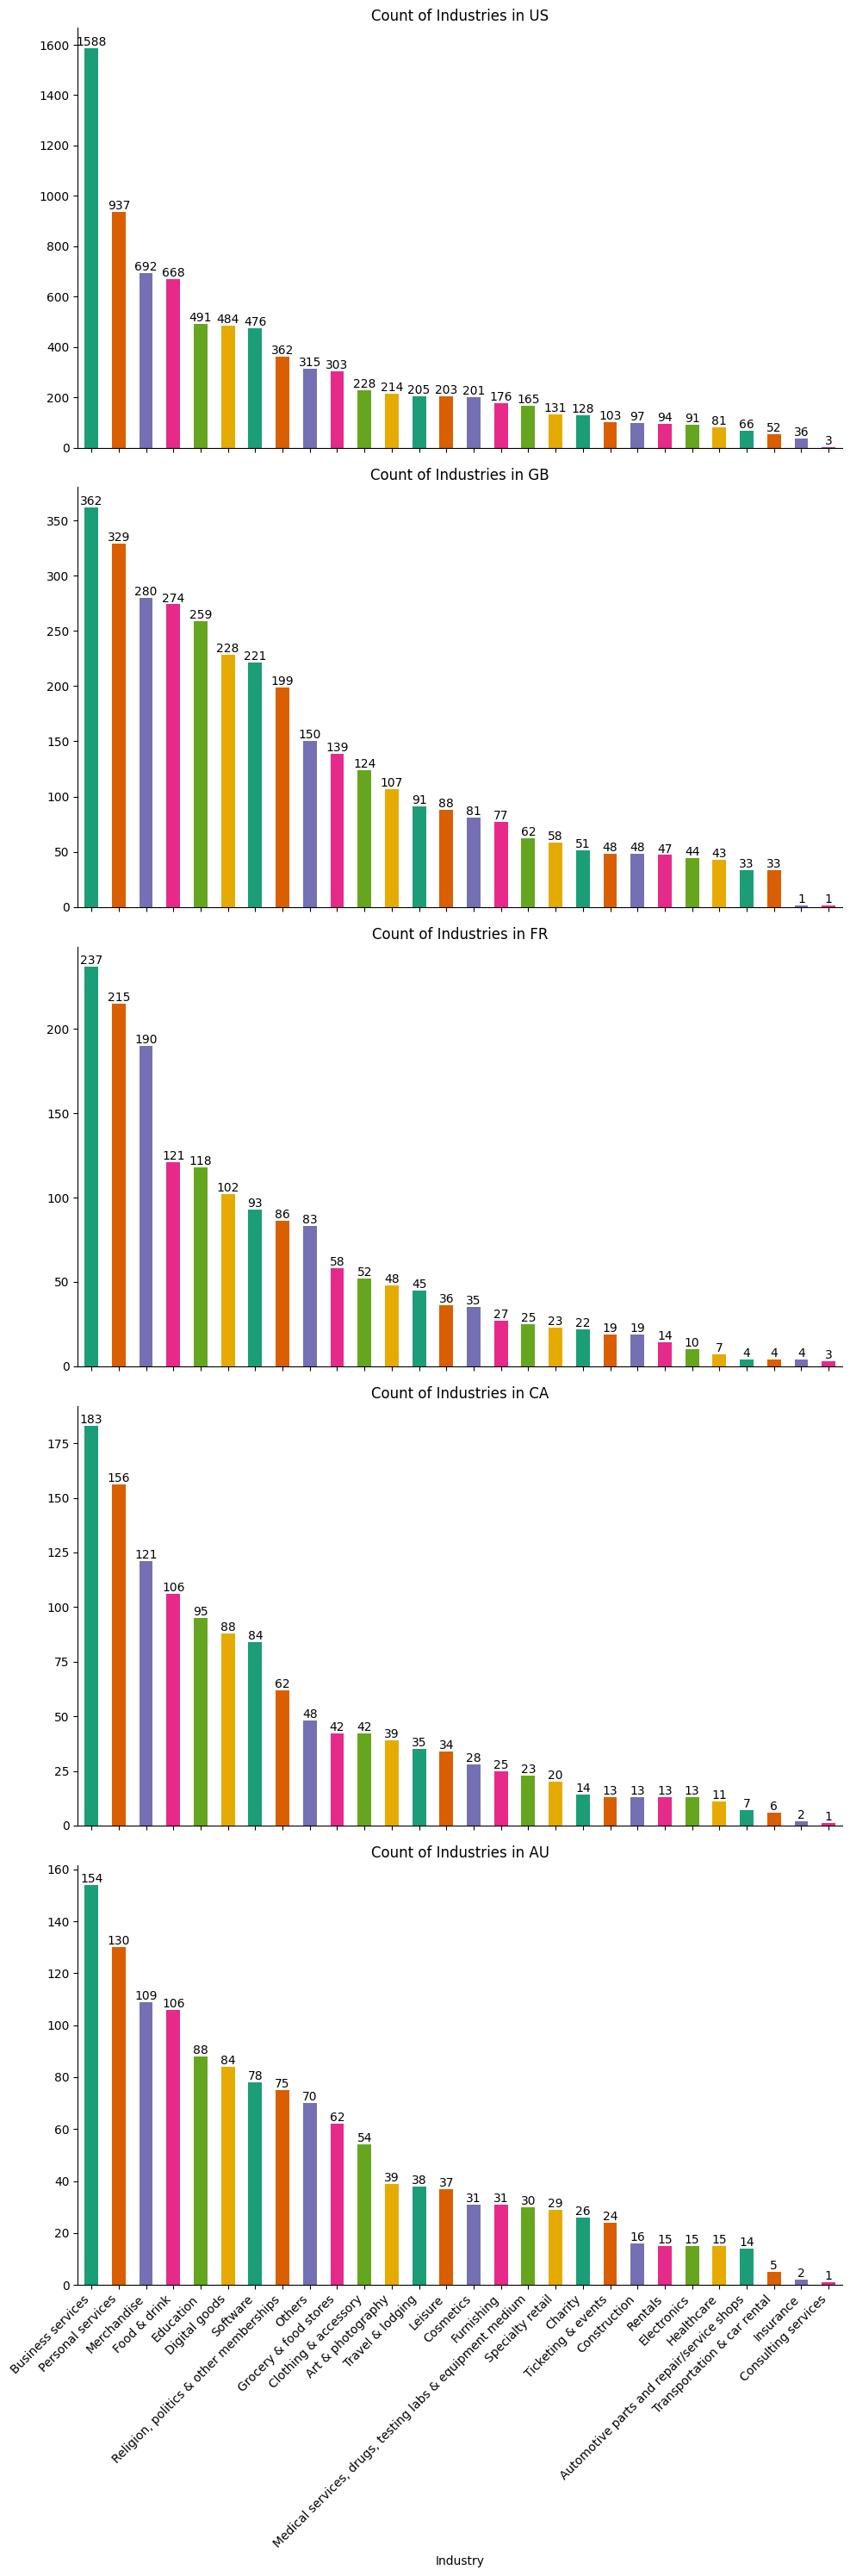

In [28]:
# Group the DataFrame by the "country" column
grouped = merchant_df.groupby('country')

# Define the countries for which you want to create subplots
top_countries = ['US', 'GB', 'FR', 'CA', 'AU']
bottom_countries = ['CY', 'MT', 'HR', 'TH', 'GI']

# Create subplots for each top country
fig, axes = plt.subplots(nrows=len(top_countries), ncols=1, figsize=(10, 6*len(top_countries)), sharex=True)

# Iterate over each top country and create a subplot
for i, country in enumerate(top_countries):
    # Filter the DataFrame for the current country
    country_data = grouped.get_group(country)

    # Get counts of industries for the current country
    industry_counts = country_data["industry"].value_counts()

    # Plotting for industries where "country" column is the current country
    bars = industry_counts.plot(kind="bar", color=sns.palettes.mpl_palette('Dark2'), ax=axes[i])

    # Add data labels to each bar column
    for bar in bars.patches:
        axes[i].annotate(format(bar.get_height(), '.0f'),
                         (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                         ha='center', va='center',
                         xytext=(0, 5),
                         textcoords='offset points')
    # Set x-axis tick labels to be the industries
    axes[i].set_xticklabels(industry_counts.index, rotation=45, ha='right')

    # Set subplot title
    axes[i].set_title(f'Count of Industries in {country}')

    # Hide spines for each subplot
    axes[i].spines[['top', 'right']].set_visible(False)

# Set common xlabel
plt.xlabel('Industry')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

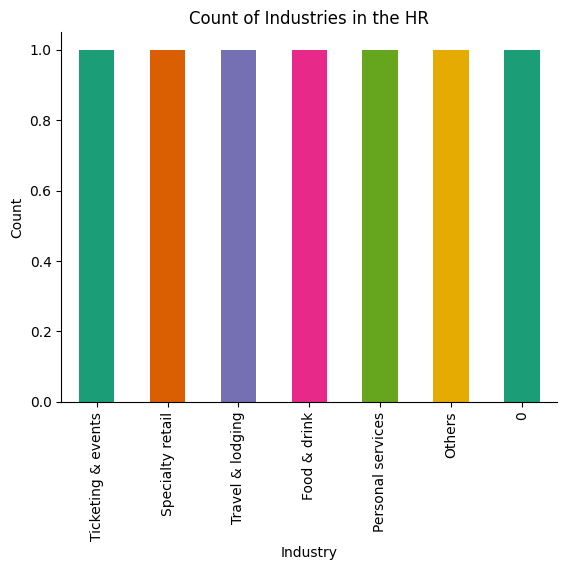

In [32]:
# Filter the DataFrame to include only rows where the "country" column is ['CY', 'MT', 'HR', 'TH', 'GI']
HR_data = merchant_df[merchant_df['country'] == 'HR']

# Plotting for industries where "country" column is "HR"
HR_data["industry"].value_counts().plot(kind="bar", color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Industry')
plt.ylabel('Count')
plt.title('Count of Industries in the HR')
plt.show()

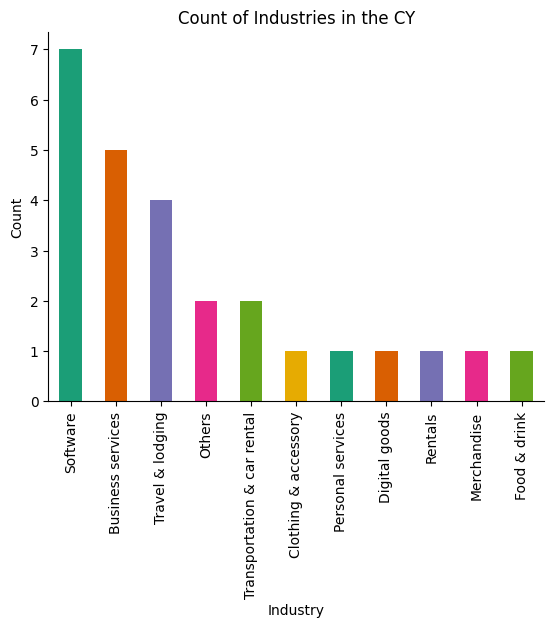

In [33]:
CY_data = merchant_df[merchant_df['country'] == 'CY']

# Plotting for industries where "country" column is "CY"
CY_data["industry"].value_counts().plot(kind="bar", color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Industry')
plt.ylabel('Count')
plt.title('Count of Industries in the CY')
plt.show()

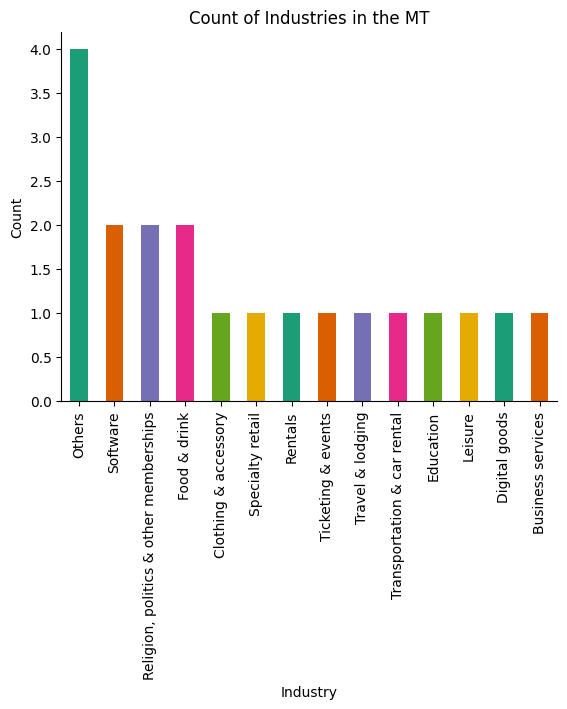

In [34]:
MT_data = merchant_df[merchant_df['country'] == 'MT']

# Plotting for industries where "country" column is "US"
MT_data["industry"].value_counts().plot(kind="bar", color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Industry')
plt.ylabel('Count')
plt.title('Count of Industries in the MT')
plt.show()

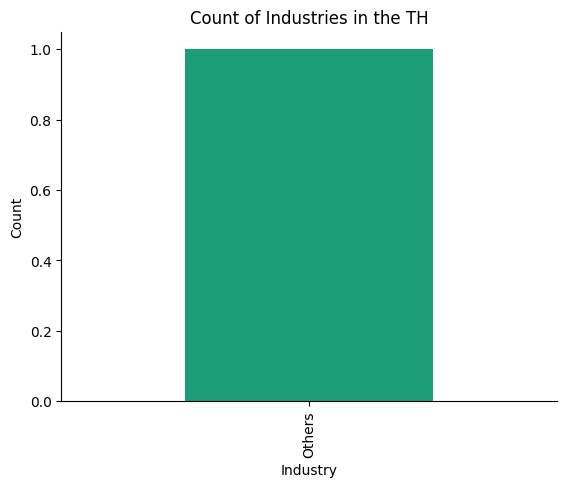

In [35]:
# Filter the DataFrame to include only rows where the "country" column is "TH"
TH_data = merchant_df[merchant_df['country'] == 'TH']

# Plotting for industries where "country" column is "TH"
TH_data["industry"].value_counts().plot(kind="bar", color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Industry')
plt.ylabel('Count')
plt.title('Count of Industries in the TH')
plt.show()

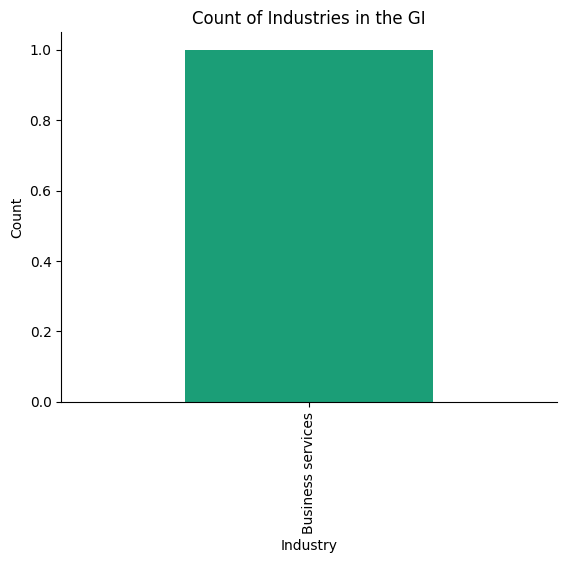

In [36]:
# Filter the DataFrame to include only rows where the "country" column is "GI"
GI_data = merchant_df[merchant_df['country'] == 'GI']

# Plotting for industries where "country" column is "GI"
GI_data["industry"].value_counts().plot(kind="bar", color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Industry')
plt.ylabel('Count')
plt.title('Count of Industries in the GI')
plt.show()

# **Exploration of top and bottom countries based on business size**

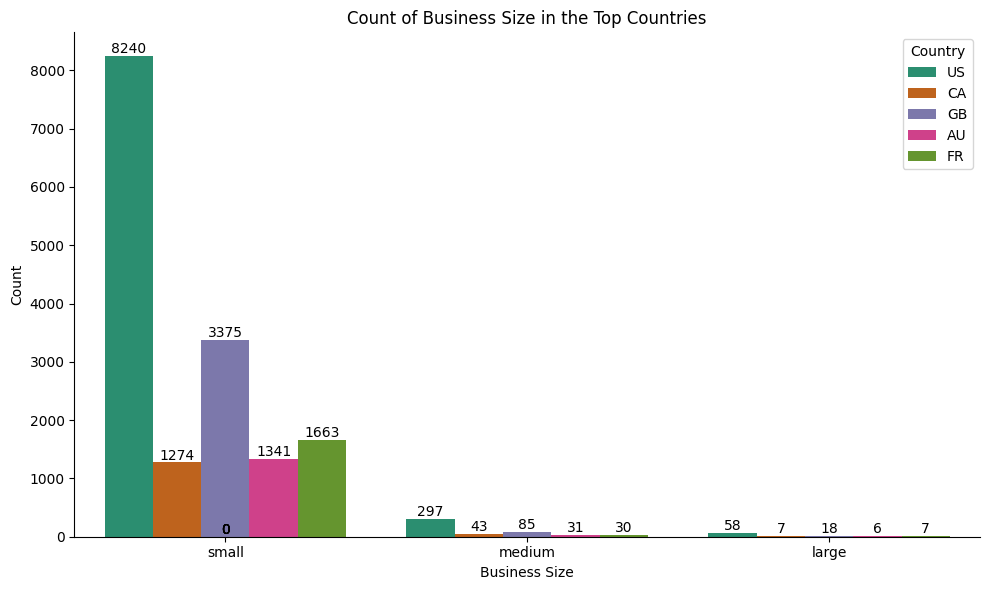

In [60]:
# Custom sorting order for business size categories
business_size_order = ['small', 'medium', 'large']

# Filter the DataFrame to include only rows where the "country" column is in top_countries
top_countries = ['US', 'GB', 'FR', 'CA', 'AU']
top_data = merchant_df[merchant_df['country'].isin(top_countries)]

# Group the DataFrame by the "country" and "business_size" columns
grouped = top_data.groupby(['country', 'business_size'])

# Plotting for industries where "country" column is in top_countries
plt.figure(figsize=(10, 6))
sns.countplot(data=top_data, x='business_size', hue='country', order=business_size_order, palette='Dark2')

# Add data labels to each bar column
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 5),
                       textcoords='offset points')

# Set plot labels and title
plt.xlabel('Business Size')
plt.ylabel('Count')
plt.title('Count of Business Size in the Top Countries')

# Hide spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.legend(title='Country')
plt.tight_layout()
plt.show()

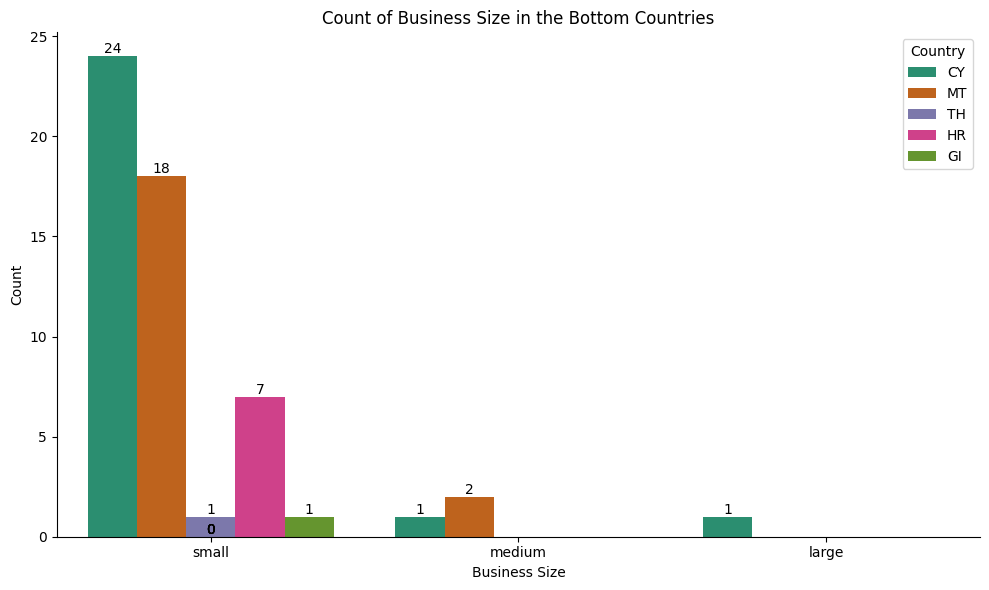

In [58]:
# Custom sorting order for business size categories
business_size_order = ['small', 'medium', 'large']

# Filter the DataFrame to include only rows where the "country" column is in bottom_countries
bottom_countries = ['CY', 'MT', 'HR', 'TH', 'GI']
bottom_data = merchant_df[merchant_df['country'].isin(bottom_countries)]

# Group the DataFrame by the "country" and "business_size" columns
grouped = bottom_data.groupby(['country', 'business_size'])

# Plotting for industries where "country" column is in bottom_countries
plt.figure(figsize=(10, 6))
sns.countplot(data=bottom_data, x='business_size', hue='country', order=business_size_order, palette='Dark2')

# Add data labels to each bar column
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 5),
                       textcoords='offset points')

# Set plot labels and title
plt.xlabel('Business Size')
plt.ylabel('Count')
plt.title('Count of Business Size in the Bottom Countries')

# Hide spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.legend(title='Country')
plt.tight_layout()
plt.show()

# **Exploration of merchants "first_charge_date"**

We would like to explore this date to gather insights such as;

Which month in the year do we have the highest merchants sign-up or charge date?

In [75]:
merchant_df['first_charge_date'].fillna(pd.to_datetime('2042-01-25 00:00:00+00:00'), inplace=True)  # Impute missing dates with the most frequent date

In [93]:
# Create a new DataFrame with the extracted year and month components
new_merchant_df = merchant_df.copy()

# Convert the date column to datetime format, ignoring errors
new_merchant_df ['year'] = pd.to_datetime(merchant_df['first_charge_date'], errors='coerce').dt.year
new_merchant_df ['month'] = pd.to_datetime(merchant_df['first_charge_date'], errors='coerce').dt.month

# Convert 'year' and 'month' columns to datetime format
new_merchant_df['year'] = pd.to_datetime(new_merchant_df['year'], format='%Y').dt.year
new_merchant_df['month'] = pd.to_datetime(new_merchant_df['month'], format='%m').dt.month

# Create a new column that merges 'year' and 'month' together
new_merchant_df['year_month'] = new_merchant_df['year'].astype(str) + '-' + new_merchant_df['month'].astype(str)

# Remove decimal point and trailing zeros from the values
new_merchant_df['year_month'] = new_merchant_df['year_month'].str.replace('.0', '')

# Display the new DataFrame
#print(new_merchant_df)

In [94]:
new_merchant_df.head()

,merchant,industry,first_charge_date,country,business_size,year,month,year_month
0,5d03e714,Education,2032-02-13 00:00:00+00:00,US,medium,2032.0,2.0,2032-2
1,da22f154,Others,2031-10-16 00:00:00+00:00,US,small,2031.0,10.0,2031-10
2,687eebc8,Software,2032-07-23 00:00:00+00:00,US,small,2032.0,7.0,2032-7
3,de478470,Software,2033-03-15 00:00:00+00:00,US,small,2033.0,3.0,2033-3
4,1e719b8a,Business services,2035-02-12 00:00:00+00:00,IT,small,2035.0,2.0,2035-2


year
2041.0    0.329181
2040.0    0.211305
2042.0    0.155290
2039.0    0.100716
2038.0    0.074997
2037.0    0.055125
2036.0    0.032922
2035.0    0.019872
2034.0    0.012542
2033.0    0.006186
2032.0    0.001737
2031.0    0.000085
2030.0    0.000042
Name: proportion, dtype: float64

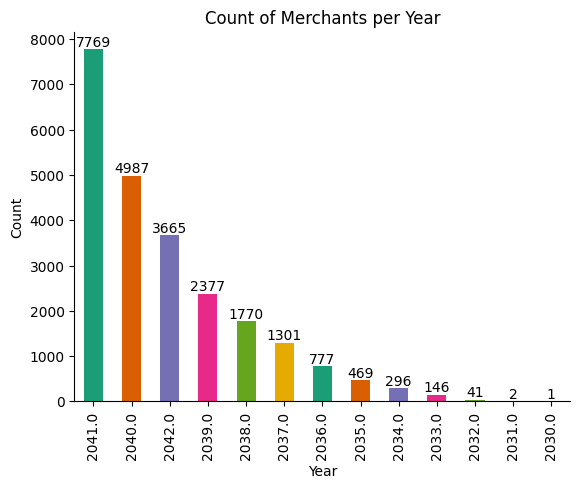

In [97]:
#Plot the counts of merchant per year
new_merchant_df["year"].value_counts().plot(kind="bar", color=sns.palettes.mpl_palette('Dark2'))

# Add data labels to each bar column
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 5),
                       textcoords='offset points')

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Merchants per Year')

plt.gca().spines[['top', 'right',]].set_visible(False);

#To display the proportion of business size counts
new_merchant_df["year"].value_counts(normalize=True)

# **Exploration of month on month for top and bottom years**

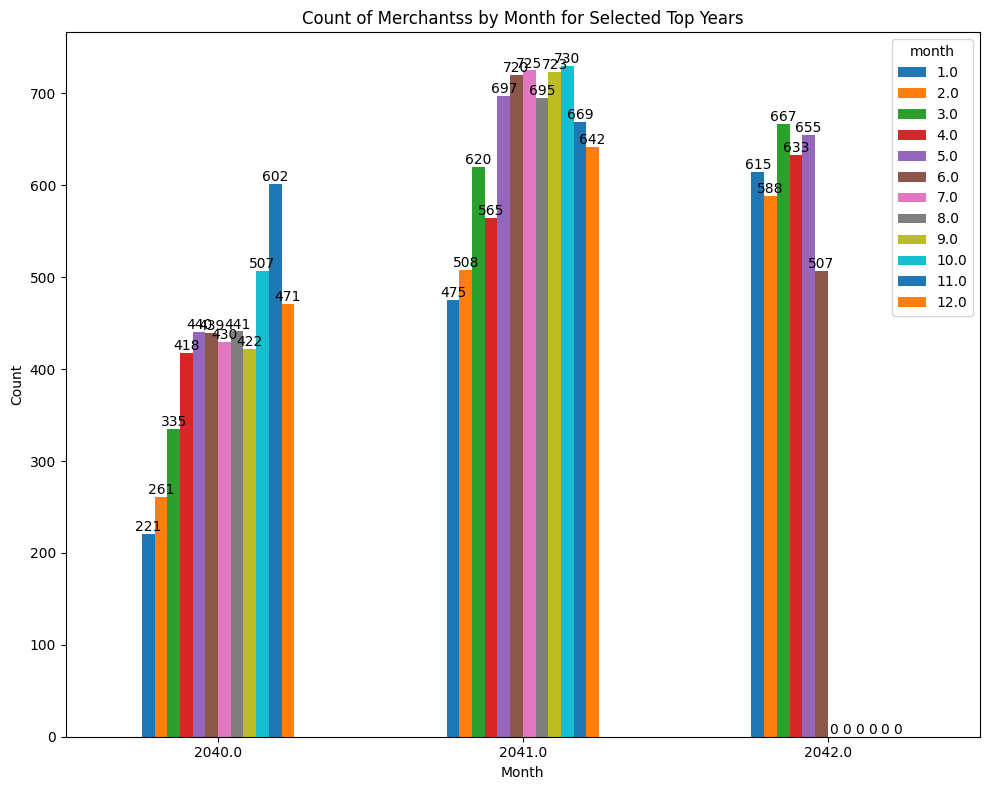

In [116]:
# Filter the DataFrame for the years you want to plot
years_to_plot = [2040, 2041, 2042]
filtered_df = new_merchant_df[new_merchant_df['year'].isin(years_to_plot)]

# Group the filtered DataFrame by month and year, and count the occurrences
grouped_df = filtered_df.groupby(['year', 'month']).size().unstack()

# Plotting
grouped_df.plot(kind='bar', figsize=(10, 8))

# Add data labels to each bar column
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 5),
                       textcoords='offset points')

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Merchantss by Month for Selected Top Years')

# Show the plot
#plt.legend(title='Year")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [117]:
grouped_df

month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
year,,,,,,,,,,,,
2040.0,221.0,261.0,335.0,418.0,440.0,439.0,430.0,441.0,422.0,507.0,602.0,471.0
2041.0,475.0,508.0,620.0,565.0,697.0,720.0,725.0,695.0,723.0,730.0,669.0,642.0
2042.0,615.0,588.0,667.0,633.0,655.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN


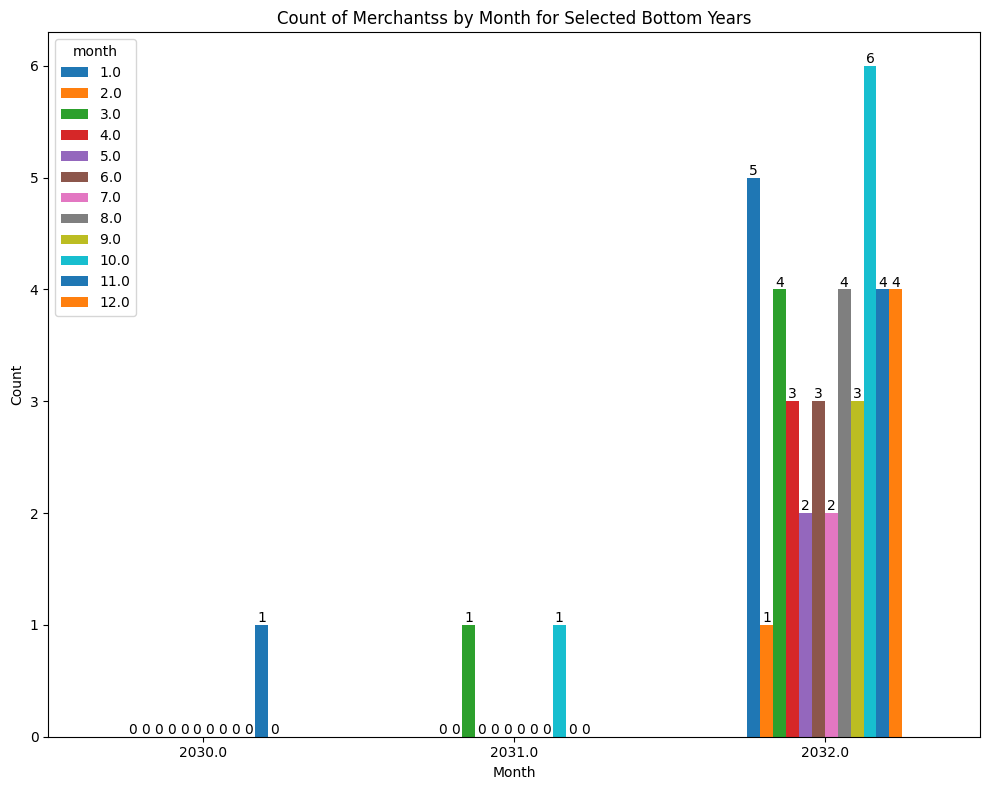

In [120]:
# Filter the DataFrame for the years you want to plot
years_to_plot = [2032, 2031, 2030]
filtered_df = new_merchant_df[new_merchant_df['year'].isin(years_to_plot)]

# Group the filtered DataFrame by month and year, and count the occurrences
grouped_df = filtered_df.groupby(['year','month']).size().unstack()

# Plotting
grouped_df.plot(kind='bar', figsize=(10, 8))

# Add data labels to each bar column
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 5),
                       textcoords='offset points')

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Merchantss by Month for Selected Bottom Years')

# Show the plot
#plt.legend(title='Year")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [121]:
grouped_df

month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
year,,,,,,,,,,,,
2030.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2031.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2032.0,5.0,1.0,4.0,3.0,2.0,3.0,2.0,4.0,3.0,6.0,4.0,4.0


## **Exploration of top and bottom years based on industry**

## **Exploration of top and bottom years based on business size**

## **Exploration of top and bottom years based on countries**

# **Exploratory Data Analysis on Payment Data Set**

**Distribution plots on subscription volume, checkout volume, payment link volume and total volume**

In [69]:
payment_df.describe()

,subscription_volume,checkout_volume,payment_link_volume,total_volume
count,1.577887e+06,1.577887e+06,1.577887e+06,1.577887e+06
mean,3.924766e+04,1.101376e+04,1.843901e+03,3.582914e+05
std,7.253647e+05,1.608574e+05,3.717659e+04,6.488684e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+03
50%,0.000000e+00,0.000000e+00,0.000000e+00,1.987200e+04
75%,0.000000e+00,0.000000e+00,0.000000e+00,7.230000e+04
max,1.083879e+08,3.425907e+07,1.182900e+07,2.243810e+09


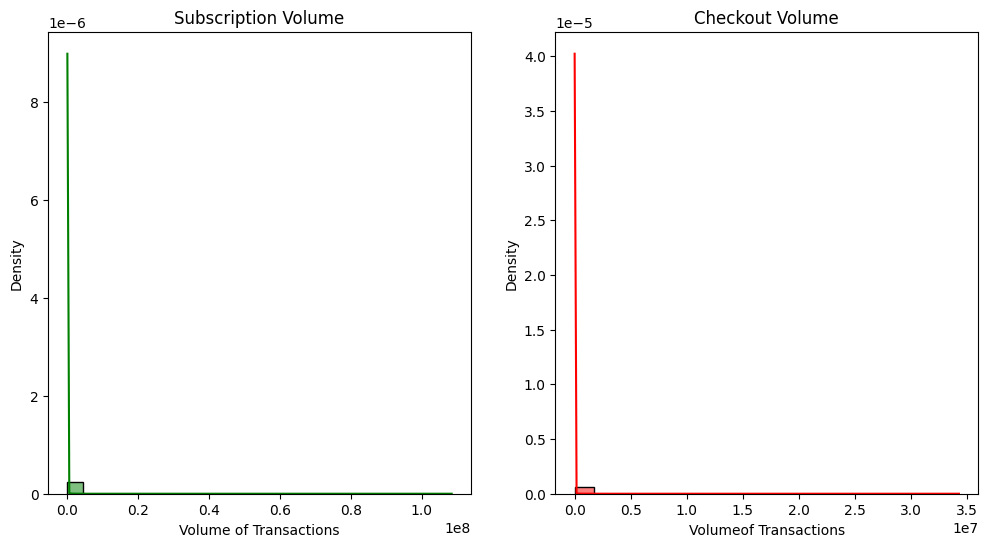

In [124]:
#To plot the histograms for all four transaction volume
fig = plt.figure(figsize=(12,6))

#Subscription Volume histogram
plt.subplot(121)
plt.title('Subscription Volume')
sns.histplot(data=payment_df, x='subscription_volume', kde=True, bins=25,stat="density", color='green')
plt.xlabel('Volume of Transactions')

#Checkout Volume histogram
plt.subplot(122)
plt.title('Checkout Volume')
sns.histplot(data=payment_df, x='checkout_volume', kde=True, bins=20,stat="density",color='red')
plt.xlabel('Volumeof Transactions')
plt.show()

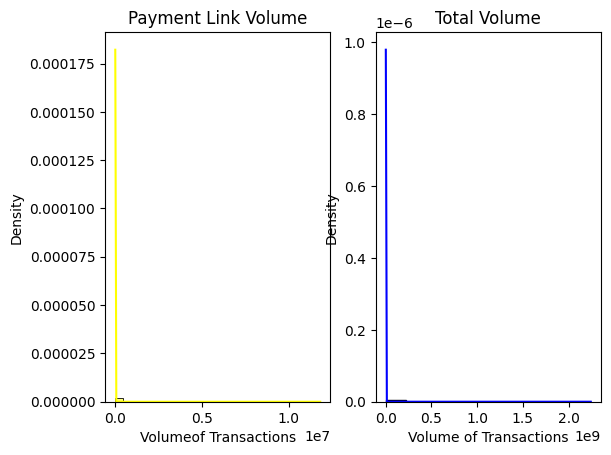

In [126]:
#Payment Link Volume histogram
plt.subplot(121)
plt.title('Payment Link Volume')
sns.histplot(data=payment_df, x='payment_link_volume', kde=True, bins=25,stat="density", color='yellow')
plt.xlabel('Volume of Transactions')


#Total Volume histogram
plt.subplot(122)
plt.title('Total Volume')
sns.histplot(data=payment_df, x='total_volume', kde=True, bins=10,stat="density",color='blue', edgecolor='black')
plt.xlabel('Volume of Transactions')
plt.show()

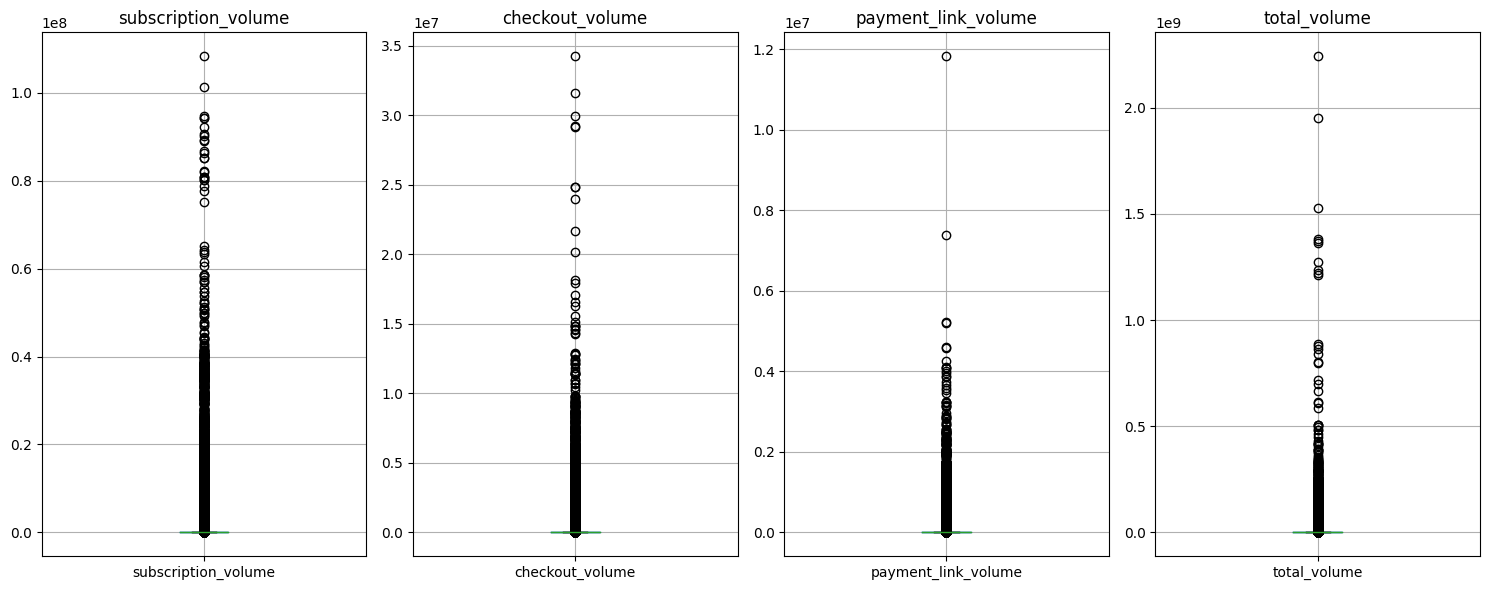

In [127]:
columns = ['subscription_volume', 'checkout_volume', 'payment_link_volume', 'total_volume']

# Create subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 6))

# Plot box plots for each column
for i, column in enumerate(columns):
    payment_df.boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# **Exploration of payments volumes by "date"**

We would like to explore this date to gather insights such as;

Which month in the year do we have the highest payment volume for each category?

In [130]:
# Create a new DataFrame with the extracted year and month components
new_payment_df = payment_df.copy()

# Convert the date column to datetime format, ignoring errors
new_payment_df ['year'] = pd.to_datetime(payment_df['date'], errors='coerce').dt.year
new_payment_df ['month'] = pd.to_datetime(payment_df['date'], errors='coerce').dt.month

# Convert 'year' and 'month' columns to datetime format
new_payment_df['year'] = pd.to_datetime(new_payment_df['year'], format='%Y').dt.year
new_payment_df['month'] = pd.to_datetime(new_payment_df['month'], format='%m').dt.month

# Create a new column that merges 'year' and 'month' together
new_payment_df['year_month'] = new_payment_df['year'].astype(str) + '-' + new_merchant_df['month'].astype(str)

# Remove decimal point and trailing zeros from the values
new_payment_df['year_month'] = new_payment_df['year_month'].str.replace('.0', '')

# Display the new DataFrame
#print(new_payment_df)

In [2]:
'''# Create a new DataFrame with the extracted year and month components
new_payment_df2 = payment_df.copy()

# Convert the date column to datetime format, ignoring errors
new_payment_df2 ['year_month'] = pd.to_datetime(payment_df['date'], errors='coerce').dt.strftime('%Y-%m')
new_payment_df2['year'] = pd.to_datetime(new_payment_df2['date']).dt.year
new_payment_df2['month'] = pd.to_datetime(new_payment_df2['date']).dt.month

# Display the new DataFrame
#print(new_payment_df2)'''

"# Create a new DataFrame with the extracted year and month components\nnew_payment_df2 = payment_df.copy()\n\n# Convert the date column to datetime format, ignoring errors\nnew_payment_df2 ['year_month'] = pd.to_datetime(payment_df['date'], errors='coerce').dt.strftime('%Y-%m')\nnew_payment_df2['year'] = pd.to_datetime(new_payment_df2['date']).dt.year\nnew_payment_df2['month'] = pd.to_datetime(new_payment_df2['date']).dt.month\n\n# Display the new DataFrame\n#print(new_payment_df2)"

year
2041    0.562342
2042    0.437658
Name: proportion, dtype: float64

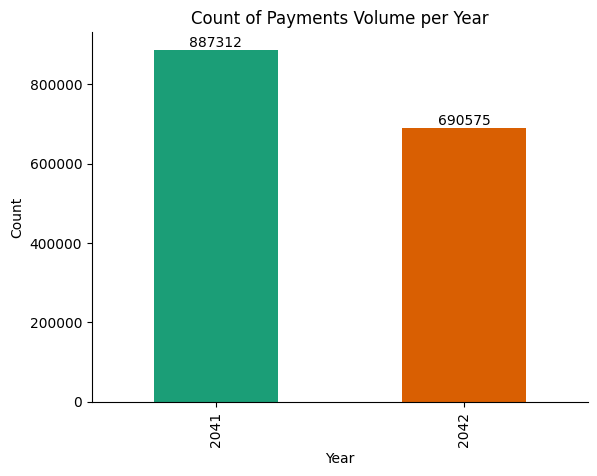

In [132]:
#Plot the counts of merchant per year
new_payment_df["year"].value_counts().plot(kind="bar", color=sns.palettes.mpl_palette('Dark2'))

# Add data labels to each bar column
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 5),
                       textcoords='offset points')

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Payments Volume per Year')

plt.gca().spines[['top', 'right',]].set_visible(False);

#To display the proportion of business size counts
new_payment_df["year"].value_counts(normalize=True)

In [3]:
'''#Plot the counts of merchant per year
new_payment_df2["year"].value_counts().plot(kind="bar", color=sns.palettes.mpl_palette('Dark2'))

# Add data labels to each bar column
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 5),
                       textcoords='offset points')

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Payments Volume per Year')

plt.gca().spines[['top', 'right',]].set_visible(False);

#To display the proportion of business size counts
new_payment_df2["year"].value_counts(normalize=True)'''

'#Plot the counts of merchant per year\nnew_payment_df2["year"].value_counts().plot(kind="bar", color=sns.palettes.mpl_palette(\'Dark2\'))\n\n# Add data labels to each bar column\nfor p in plt.gca().patches:\n    plt.gca().annotate(format(p.get_height(), \'.0f\'), \n                       (p.get_x() + p.get_width() / 2., p.get_height()), \n                       ha=\'center\', va=\'center\', \n                       xytext=(0, 5), \n                       textcoords=\'offset points\')\n\n# Set plot labels and title\nplt.xlabel(\'Year\')\nplt.ylabel(\'Count\')\nplt.title(\'Count of Payments Volume per Year\')\n\nplt.gca().spines[[\'top\', \'right\',]].set_visible(False);\n\n#To display the proportion of business size counts\nnew_payment_df2["year"].value_counts(normalize=True)'

year_month
2041-5      0.099589
2041-6      0.094934
2041-4      0.093325
2041-3      0.091336
2041-11     0.084649
2041-10     0.080120
2041-2      0.079020
2041-1      0.078131
2041-8      0.075295
2041-9      0.075211
2041-12     0.073856
2041-7      0.073433
2041-nan    0.001100
Name: proportion, dtype: float64

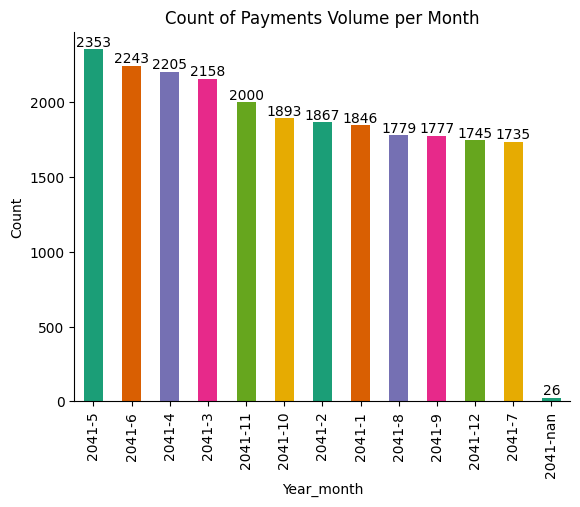

In [133]:
#Plot the counts of merchant per year
new_payment_df["year_month"].value_counts().plot(kind="bar", color=sns.palettes.mpl_palette('Dark2'))

# Add data labels to each bar column
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 5),
                       textcoords='offset points')

# Set plot labels and title
plt.xlabel('Year_month')
plt.ylabel('Count')
plt.title('Count of Payments Volume per Month')

plt.gca().spines[['top', 'right',]].set_visible(False);

#To display the proportion of business size counts
new_payment_df["year_month"].value_counts(normalize=True)

year_month
2042-05    0.079525
2042-03    0.079418
2042-04    0.076417
2042-01    0.074618
2041-12    0.073988
2041-11    0.073034
2041-10    0.071857
2042-02    0.070631
2041-09    0.070114
2041-08    0.069568
2041-07    0.068639
2041-05    0.068055
2041-06    0.067087
2042-06    0.057048
Name: proportion, dtype: float64

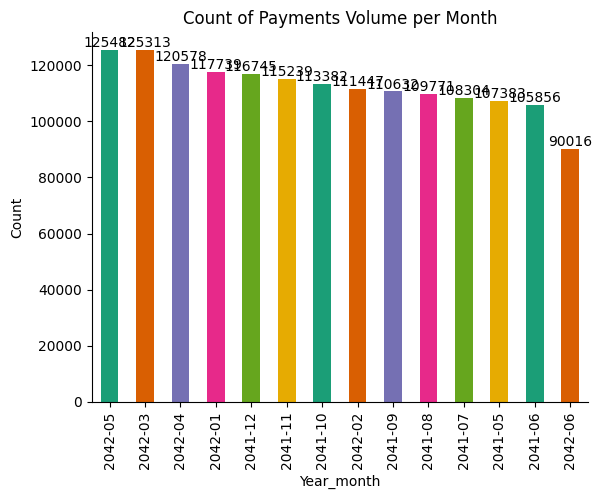

In [152]:
#Plot the counts of merchant per year
new_payment_df2["year_month"].value_counts().plot(kind="bar", color=sns.palettes.mpl_palette('Dark2'))

# Add data labels to each bar column
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 5),
                       textcoords='offset points')

# Set plot labels and title
plt.xlabel('Year_month')
plt.ylabel('Count')
plt.title('Count of Payments Volume per Month')

plt.gca().spines[['top', 'right',]].set_visible(False);

#To display the proportion of business size counts
new_payment_df2["year_month"].value_counts(normalize=True)

# **Exploration of month on month payments for each volume category**

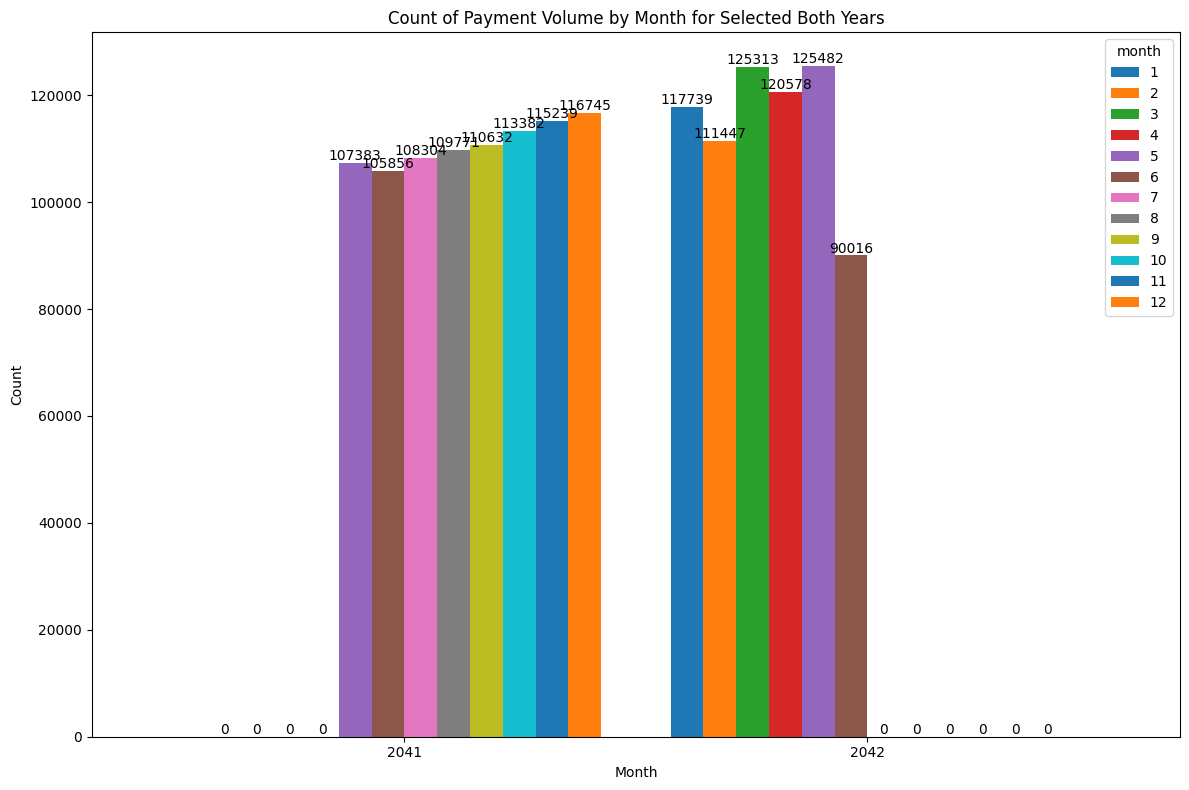

In [141]:
# Group the filtered DataFrame by month and year, and count the occurrences
grouped_df = new_payment_df.groupby(['year', 'month']).size().unstack()

# Plotting
grouped_df.plot(kind='bar', figsize=(12, 8), width=0.85)

# Add data labels to each bar column
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 5),
                       textcoords='offset points')

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Payment Volume by Month for Selected Both Years')

# Show the plot
#plt.legend(title='Year")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [4]:
'''# Group the filtered DataFrame by month and year, and count the occurrences
grouped_df = new_payment_df2.groupby(['year', 'month']).size().unstack()

# Plotting
grouped_df.plot(kind='bar', figsize=(12, 8), width=0.85)

# Add data labels to each bar column
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 5),
                       textcoords='offset points')

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Transactions that happened per Month')

# Show the plot
#plt.legend(title='Year")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()'''

'# Group the filtered DataFrame by month and year, and count the occurrences\ngrouped_df = new_payment_df2.groupby([\'year\', \'month\']).size().unstack()\n\n# Plotting\ngrouped_df.plot(kind=\'bar\', figsize=(12, 8), width=0.85)\n\n# Add data labels to each bar column\nfor p in plt.gca().patches:\n    plt.gca().annotate(format(p.get_height(), \'.0f\'),\n                       (p.get_x() + p.get_width() / 2., p.get_height()),\n                       ha=\'center\', va=\'center\',\n                       xytext=(0, 5),\n                       textcoords=\'offset points\')\n\n# Set plot labels and title\nplt.xlabel(\'Month\')\nplt.ylabel(\'Count\')\nplt.title(\'Count of Transactions that happened per Month\')\n\n# Show the plot\n#plt.legend(title=\'Year")\nplt.xticks(rotation=0)\nplt.tight_layout()\nplt.show()'

In [142]:
grouped_df

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2041,NaN,NaN,NaN,NaN,107383.0,105856.0,108304.0,109771.0,110632.0,113382.0,115239.0,116745.0
2042,117739.0,111447.0,125313.0,120578.0,125482.0,90016.0,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
new_payment_df2.describe()

,subscription_volume,checkout_volume,payment_link_volume,total_volume,year,month
count,1.577887e+06,1.577887e+06,1.577887e+06,1.577887e+06,1.577887e+06,1.577887e+06
mean,3.924766e+04,1.101376e+04,1.843901e+03,3.582914e+05,2.041438e+03,6.320360e+00
std,7.253647e+05,1.608574e+05,3.717659e+04,6.488684e+06,4.960984e-01,3.267721e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.041000e+03,1.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+03,2.041000e+03,4.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,1.987200e+04,2.041000e+03,6.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,7.230000e+04,2.042000e+03,9.000000e+00
max,1.083879e+08,3.425907e+07,1.182900e+07,2.243810e+09,2.042000e+03,1.200000e+01


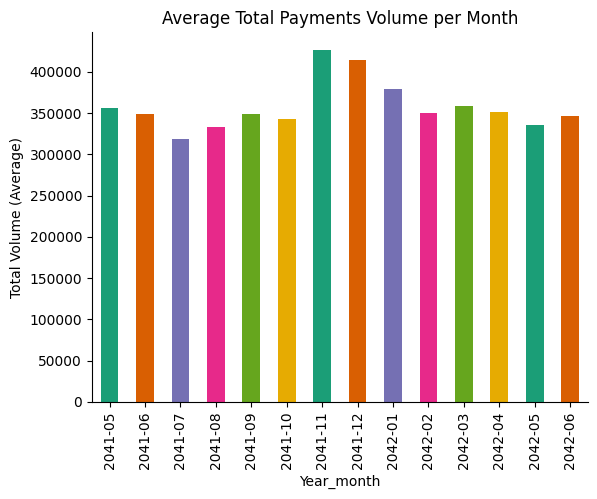

In [167]:
#Plot the total volume per month
# Group the DataFrame by 'year_month' and sum the 'total volume' column
volume_per_month = new_payment_df2.groupby('year_month')['total_volume'].mean()

# Plotting
volume_per_month.plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))


'''# Add data labels to each bar column
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 5),
                       textcoords='offset points')'''

# Set plot labels and title
plt.xlabel('Year_month')
plt.ylabel('Total Volume (Average)')
plt.title('Average Total Payments Volume per Month')

plt.gca().spines[['top', 'right',]].set_visible(False);


In [166]:
volume_per_month

year_month
2041-05    356407.463137
2041-06    348363.768176
2041-07    318967.231072
2041-08    332793.066784
2041-09    349224.374503
2041-10    342748.013627
2041-11    426595.170428
2041-12    414232.252465
2042-01    378728.840214
2042-02    349880.897844
2042-03    358596.543415
2042-04    350803.682529
2042-05    335100.289524
2042-06    346961.949853
Name: total_volume, dtype: float64

year_month
2041-05    33387.359414
2041-06    33366.560601
2041-07    33358.982789
2041-08    34229.119604
2041-09    34691.096961
2041-10    36289.185347
2041-11    37122.433117
2041-12    38977.283824
2042-01    44850.789917
2042-02    45331.290380
2042-03    43410.933933
2042-04    45209.869993
2042-05    43385.163306
2042-06    44346.845327
Name: subscription_volume, dtype: float64

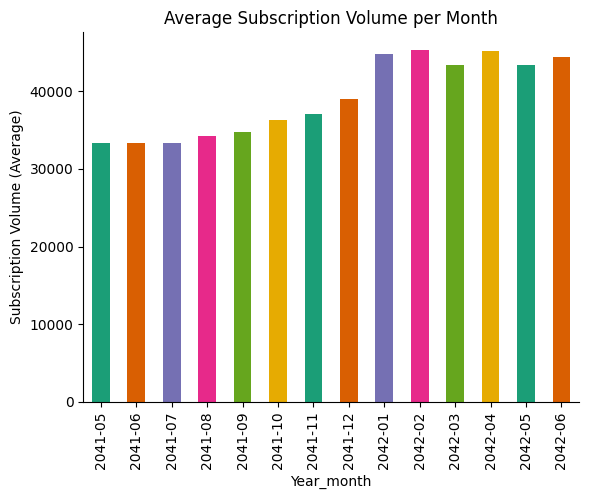

In [168]:
#Plot the subscription volume per month
# Group the DataFrame by 'year_month' and sum the 'total volume' column
sub_volume_per_month = new_payment_df2.groupby('year_month')['subscription_volume'].mean()

# Plotting
sub_volume_per_month.plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))

# Set plot labels and title
plt.xlabel('Year_month')
plt.ylabel('Subscription Volume (Average)')
plt.title('Average Subscription Volume per Month')

plt.gca().spines[['top', 'right',]].set_visible(False);

sub_volume_per_month

year_month
2041-05     9777.070793
2041-06    10450.152235
2041-07    11246.100347
2041-08    10517.642037
2041-09     9278.405859
2041-10     9449.396500
2041-11    10767.058669
2041-12    11267.133530
2042-01    12311.493991
2042-02    11498.831615
2042-03    11466.472242
2042-04    12355.705668
2042-05    11949.137852
2042-06    11537.999867
Name: checkout_volume, dtype: float64

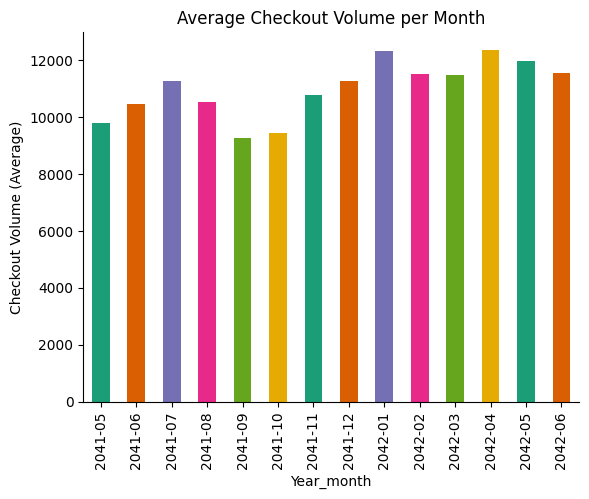

In [169]:
#Plot the checkout volume per month
# Group the DataFrame by 'year_month' and sum the 'total volume' column
checkout_volume_per_month = new_payment_df2.groupby('year_month')['checkout_volume'].mean()

# Plotting
checkout_volume_per_month.plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))

# Set plot labels and title
plt.xlabel('Year_month')
plt.ylabel('Checkout Volume (Average)')
plt.title('Average Checkout Volume per Month')

plt.gca().spines[['top', 'right',]].set_visible(False);

checkout_volume_per_month

year_month
2041-05       9.626803
2041-06     165.555963
2041-07     678.461996
2041-08     815.523626
2041-09    1017.886335
2041-10    1278.884550
2041-11    1634.471134
2041-12    1590.718164
2042-01    2151.996688
2042-02    2309.000108
2042-03    3037.318802
2042-04    3726.312545
2042-05    3405.704531
2042-06    3646.514109
Name: payment_link_volume, dtype: float64

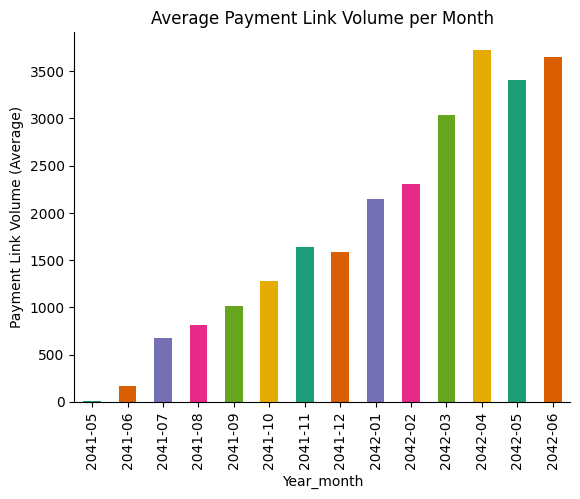

In [170]:
#Plot the payment link volume per month
# Group the DataFrame by 'year_month' and sum the 'total volume' column
payment_link_per_month = new_payment_df2.groupby('year_month')['payment_link_volume'].mean()

# Plotting
payment_link_per_month.plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))

# Set plot labels and title
plt.xlabel('Year_month')
plt.ylabel('Payment Link Volume (Average)')
plt.title('Average Payment Link Volume per Month')

plt.gca().spines[['top', 'right',]].set_visible(False);

payment_link_per_month

## **Merging of Payment date to Merchant data on "merchant" column for further exploration of the complete data set.**

In [180]:
# Perform the join operation
merged_transaction_df = pd.merge(merchant_df, payment_df, on='merchant', how='inner')

# Display the merged DataFrame
print(merged_transaction_df)

         merchant   industry          first_charge_date country business_size  \
0        5d03e714  Education  2032-02-13 00:00:00+00:00      US        medium   
1        5d03e714  Education  2032-02-13 00:00:00+00:00      US        medium   
2        5d03e714  Education  2032-02-13 00:00:00+00:00      US        medium   
3        5d03e714  Education  2032-02-13 00:00:00+00:00      US        medium   
4        5d03e714  Education  2032-02-13 00:00:00+00:00      US        medium   
...           ...        ...                        ...     ...           ...   
1578932  6f0e5a0b          0  2042-06-22 00:00:00+00:00      US         small   
1578933  13c47cc6          0  2042-06-22 00:00:00+00:00      CA         small   
1578934  5b4f584e          0  2042-06-22 00:00:00+00:00      US         small   
1578935  4807c040          0  2042-06-22 00:00:00+00:00      IT         small   
1578936  e289a7fc          0  2042-06-22 00:00:00+00:00      US         small   

                         da

In [181]:
merged_transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1578937 entries, 0 to 1578936
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   merchant             1578937 non-null  object
 1   industry             1578937 non-null  object
 2   first_charge_date    1578937 non-null  object
 3   country              1578937 non-null  object
 4   business_size        1578937 non-null  object
 5   date                 1578937 non-null  object
 6   subscription_volume  1578937 non-null  int64 
 7   checkout_volume      1578937 non-null  int64 
 8   payment_link_volume  1578937 non-null  int64 
 9   total_volume         1578937 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 120.5+ MB


In [176]:
merged_transaction_df.describe()

,subscription_volume,checkout_volume,payment_link_volume,total_volume
count,1.578937e+06,1.578937e+06,1.578937e+06,1.578937e+06
mean,3.922162e+04,1.100724e+04,1.843842e+03,3.580656e+05
std,7.251242e+05,1.608042e+05,3.716793e+04,6.486533e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+03
50%,0.000000e+00,0.000000e+00,0.000000e+00,1.984100e+04
75%,0.000000e+00,0.000000e+00,0.000000e+00,7.220600e+04
max,1.083879e+08,3.425907e+07,1.182900e+07,2.243810e+09


industry
Specialty retail                                            2.379243e+06
Consulting services                                         2.201903e+06
Ticketing & events                                          1.222899e+06
Merchandise                                                 9.324410e+05
Medical services, drugs, testing labs & equipment medium    6.996118e+05
Furnishing                                                  6.938782e+05
Cosmetics                                                   4.355482e+05
Software                                                    3.770695e+05
Clothing & accessory                                        3.368369e+05
Education                                                   3.193241e+05
Others                                                      3.034482e+05
Charity                                                     2.807206e+05
Travel & lodging                                            2.765863e+05
Transportation & car rental               

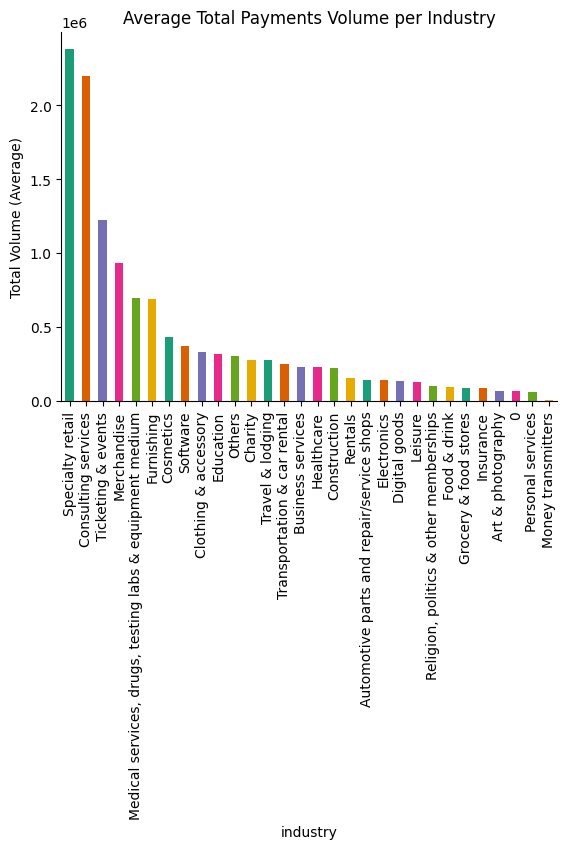

In [183]:
#Plot the total volume per industry
# Group the DataFrame by 'year_month' and sum the 'total volume' column
volume_per_industry = merged_transaction_df.groupby('industry')['total_volume'].mean()

# Sort the values by the average total volume per industry in descending order
volume_per_industry_sorted = volume_per_industry.sort_values(ascending=False)

# Plotting
volume_per_industry_sorted.plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))

# Set plot labels and title
plt.xlabel('industry')
plt.ylabel('Total Volume (Average)')
plt.title('Average Total Payments Volume per Industry')

plt.gca().spines[['top', 'right',]].set_visible(False);

volume_per_industry_sorted

business_size
large     1.277686e+07
medium    1.430698e+06
small     1.352380e+05
Name: total_volume, dtype: float64

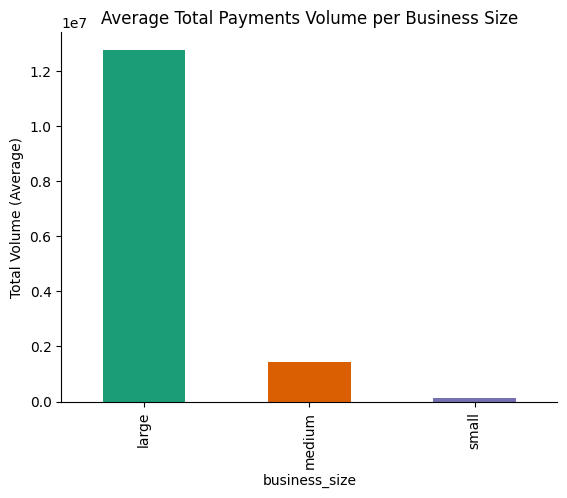

In [184]:
#Plot the total volume per business size
# Group the DataFrame by 'year_month' and sum the 'total volume' column
volume_per_business_size = merged_transaction_df.groupby('business_size')['total_volume'].mean()

# Sort the values by the average total volume per business size in descending order
volume_per_business_size_sorted = volume_per_business_size.sort_values(ascending=False)

# Plotting
volume_per_business_size_sorted.plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))

# Set plot labels and title
plt.xlabel('business_size')
plt.ylabel('Total Volume (Average)')
plt.title('Average Total Payments Volume per Business Size')

plt.gca().spines[['top', 'right',]].set_visible(False);

volume_per_business_size_sorted

country
SG    6.269524e+06
US    5.220881e+05
HK    3.738302e+05
GB    2.443466e+05
AT    2.084487e+05
DE    1.951373e+05
FR    1.939828e+05
AU    1.743065e+05
CA    1.673094e+05
MX    1.414213e+05
NO    1.329031e+05
AE    1.228923e+05
IE    1.168412e+05
NZ    1.160611e+05
JP    1.060584e+05
LU    1.058167e+05
DK    8.369866e+04
EE    8.319298e+04
NL    7.581357e+04
CY    7.389945e+04
BE    6.564415e+04
IT    6.093356e+04
CH    6.067675e+04
BG    6.035601e+04
LT    5.720728e+04
BR    5.173512e+04
SE    5.131763e+04
HR    4.764429e+04
LV    4.723735e+04
SI    4.578008e+04
ES    4.503255e+04
PL    3.458959e+04
RO    3.425706e+04
CZ    3.400169e+04
MY    3.262131e+04
IN    3.211726e+04
FI    3.007512e+04
PT    2.956315e+04
MT    2.624392e+04
HU    2.098015e+04
SK    1.726121e+04
GR    1.295403e+04
GI    1.277005e+04
TH    1.743500e+03
Name: total_volume, dtype: float64

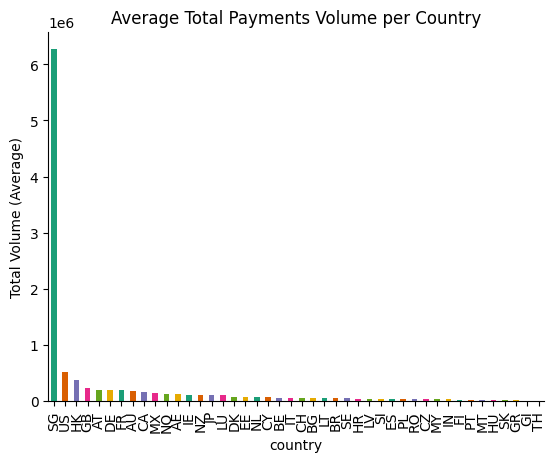

In [185]:
#Plot the total volume per Country
# Group the DataFrame by 'year_month' and sum the 'total volume' column
volume_per_country = merged_transaction_df.groupby('country')['total_volume'].mean()

# Sort the values by the average total volume per country in descending order
volume_per_country_sorted = volume_per_country.sort_values(ascending=False)

# Plotting
volume_per_country_sorted.plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))

# Set plot labels and title
plt.xlabel('country')
plt.ylabel('Total Volume (Average)')
plt.title('Average Total Payments Volume per Country')

plt.gca().spines[['top', 'right',]].set_visible(False);

volume_per_country_sorted

industry
Software                                                    145434.211087
Healthcare                                                  130072.200729
Others                                                      116563.946275
Medical services, drugs, testing labs & equipment medium     56959.292316
Consulting services                                          47981.878358
Leisure                                                      46510.655909
Business services                                            34260.718772
Digital goods                                                30891.810369
Education                                                    27357.548496
Charity                                                      19885.229697
Construction                                                 17611.614702
Specialty retail                                             15344.981949
Religion, politics & other memberships                       13899.992187
Personal services            

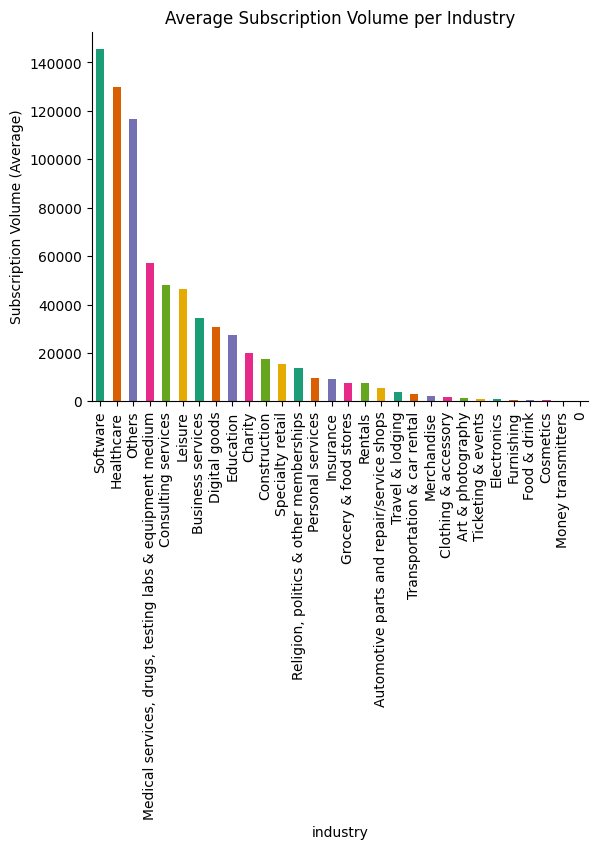

In [187]:
#Plot the subscription_volume per industry
# Group the DataFrame by 'year_month' and sum the 'subscription_volume' column
sub_volume_per_industry = merged_transaction_df.groupby('industry')['subscription_volume'].mean()

# Sort the values by the average subscription_volume per industry in descending order
sub_volume_per_industry_sorted = sub_volume_per_industry.sort_values(ascending=False)

# Plotting
sub_volume_per_industry_sorted.plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))

# Set plot labels and title
plt.xlabel('industry')
plt.ylabel('Subscription Volume (Average)')
plt.title('Average Subscription Volume per Industry')

plt.gca().spines[['top', 'right',]].set_visible(False);

sub_volume_per_industry_sorted

business_size
medium    368892.212123
large      57718.101706
small      21018.148383
Name: subscription_volume, dtype: float64

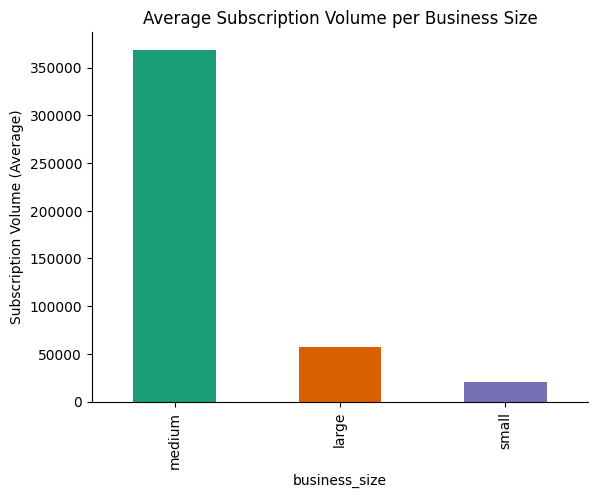

In [188]:
#Plot the subscription_volume per business_size
# Group the DataFrame by 'year_month' and sum the 'subscription_volume' column
sub_volume_per_business_size = merged_transaction_df.groupby('business_size')['subscription_volume'].mean()

# Sort the values by the average subscription_volume per business_size in descending order
sub_volume_per_business_size_sorted = sub_volume_per_business_size.sort_values(ascending=False)

# Plotting
sub_volume_per_business_size_sorted.plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))

# Set plot labels and title
plt.xlabel('business_size')
plt.ylabel('Subscription Volume (Average)')
plt.title('Average Subscription Volume per Business Size')

plt.gca().spines[['top', 'right',]].set_visible(False);

sub_volume_per_business_size_sorted

country
US    88239.549058
DK    58949.475278
NL    33070.307144
AE    29952.362911
FR    26139.309393
EE    24414.494020
BE    20964.750705
SG    20308.888042
JP    19537.350777
AU    14469.859244
CA    13575.816988
IN    10356.322322
NO     8274.202229
SE     7820.176623
IE     6486.362456
HK     6437.779854
BR     6361.937963
GB     6346.073843
GI     5899.894737
DE     4924.587175
CH     4221.097643
NZ     3837.474038
ES     3674.737843
PT     3588.247081
MX     1430.957460
AT     1400.761213
PL     1301.874643
IT     1202.952085
RO     1142.992526
BG     1021.585720
LV      949.751450
MY      792.763571
CZ      755.336273
LT      620.029299
SK      581.285458
CY      562.790605
SI      443.361427
MT      408.033469
LU      400.691166
FI      362.870533
GR       71.273931
HU        4.112403
HR        0.000000
TH        0.000000
Name: subscription_volume, dtype: float64

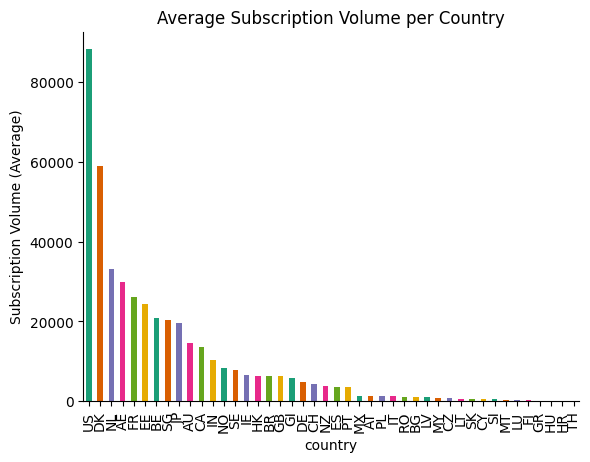

In [189]:
#Plot the subscription_volume per country
# Group the DataFrame by 'year_month' and sum the 'subscription_volume' column
sub_volume_per_country = merged_transaction_df.groupby('country')['subscription_volume'].mean()

# Sort the values by the average subscription_volume per country in descending order
sub_volume_per_country_sorted = sub_volume_per_country.sort_values(ascending=False)

# Plotting
sub_volume_per_country_sorted.plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))

# Set plot labels and title
plt.xlabel('country')
plt.ylabel('Subscription Volume (Average)')
plt.title('Average Subscription Volume per Country')

plt.gca().spines[['top', 'right',]].set_visible(False);

sub_volume_per_country_sorted

industry
Furnishing                                                  44704.057298
Electronics                                                 31317.154153
Ticketing & events                                          29480.929552
Travel & lodging                                            20476.859879
Others                                                      19192.695110
Insurance                                                   16886.642721
Clothing & accessory                                        15613.953345
Education                                                   14425.802727
Food & drink                                                14305.640553
Business services                                           13103.278025
Medical services, drugs, testing labs & equipment medium     9891.673270
Specialty retail                                             9845.925770
Leisure                                                      9737.956803
Construction                              

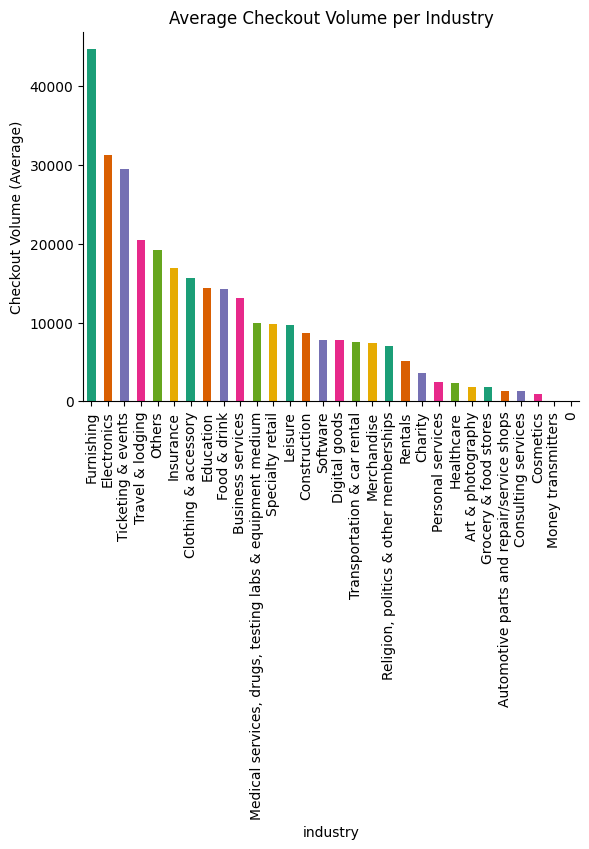

In [190]:
#Plot the checkout_volume per industry
# Group the DataFrame by 'year_month' and sum the 'checkout_volume' column
checkout_volume_per_industry = merged_transaction_df.groupby('industry')['checkout_volume'].mean()

# Sort the values by the average checkout_volume per industry in descending order
checkout_volume_per_industry_sorted = checkout_volume_per_industry.sort_values(ascending=False)

# Plotting
checkout_volume_per_industry_sorted.plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))

# Set plot labels and title
plt.xlabel('industry')
plt.ylabel('Checkout Volume (Average)')
plt.title('Average Checkout Volume per Industry')

plt.gca().spines[['top', 'right',]].set_visible(False);

checkout_volume_per_industry_sorted

business_size
medium    32263.115992
small      9891.762354
large      7802.802820
Name: checkout_volume, dtype: float64

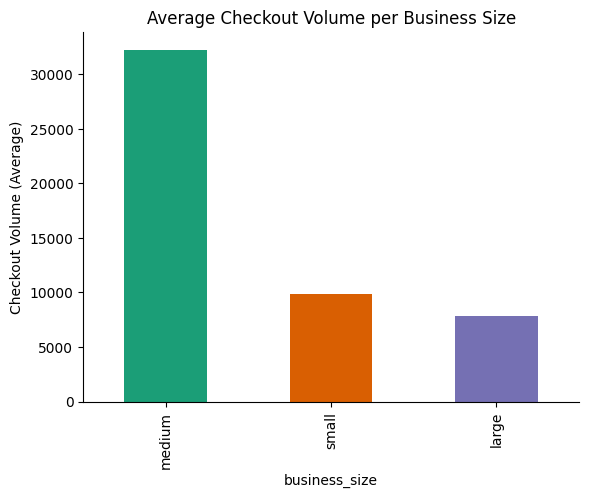

In [191]:
#Plot the checkout_volume per business_size
# Group the DataFrame by 'year_month' and sum the 'checkout_volume' column
checkout_volume_per_business_size = merged_transaction_df.groupby('business_size')['checkout_volume'].mean()

# Sort the values by the average checkout_volume per business_size in descending order
checkout_volume_per_business_size_sorted = checkout_volume_per_business_size.sort_values(ascending=False)

# Plotting
checkout_volume_per_business_size_sorted.plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))

# Set plot labels and title
plt.xlabel('business_size')
plt.ylabel('Checkout Volume (Average)')
plt.title('Average Checkout Volume per Business Size')

plt.gca().spines[['top', 'right',]].set_visible(False);

checkout_volume_per_business_size_sorted

country
HK    40573.334619
AE    34826.354187
BR    34374.936860
SG    27952.126444
EE    25046.987796
LV    22086.683585
BG    21193.425395
FR    18912.732114
AT    18202.350292
GB    17884.855510
SE    16419.690090
LU    15271.985152
CY    14129.772114
HU    13716.065245
RO    13276.406373
MX    12646.464550
NO    12627.267244
NL    12501.320329
GI    11474.631579
CA     9870.300955
MT     9491.700408
CH     9186.029323
CZ     8550.332665
IN     8352.495219
US     8089.807385
IT     8084.751406
FI     7815.790269
ES     7267.119650
SK     6925.098537
DK     6914.533447
SI     6859.218109
MY     6041.050864
JP     5861.947349
DE     5567.853532
BE     5214.438747
PT     4884.852004
PL     4525.407857
AU     3608.242758
IE     3395.000904
NZ     1282.241755
GR     1227.900204
LT      757.956772
HR       77.653846
TH        0.000000
Name: checkout_volume, dtype: float64

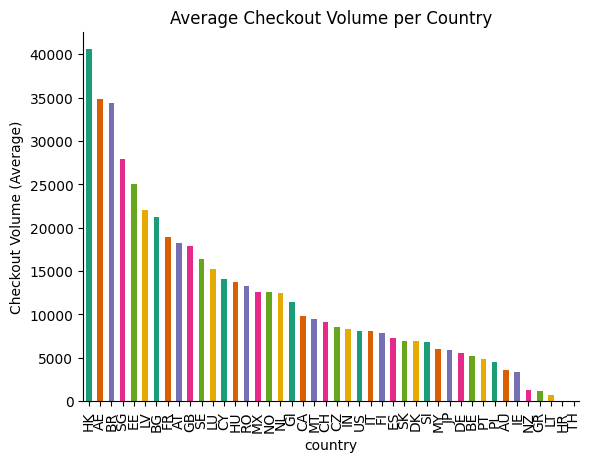

In [192]:
#Plot the checkout_volume per country
# Group the DataFrame by 'year_month' and sum the 'checkout_volume' column
checkout_volume_per_country = merged_transaction_df.groupby('country')['checkout_volume'].mean()

# Sort the values by the average checkout_volume per country in descending order
checkout_volume_per_country_sorted = checkout_volume_per_country.sort_values(ascending=False)

# Plotting
checkout_volume_per_country_sorted.plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))

# Set plot labels and title
plt.xlabel('country')
plt.ylabel('Checkout Volume (Average)')
plt.title('Average Checkout Volume per Country')

plt.gca().spines[['top', 'right',]].set_visible(False);

checkout_volume_per_country_sorted

industry
0                                                           31551.142857
Transportation & car rental                                  4284.186734
Travel & lodging                                             4025.554658
Business services                                            3736.900389
Medical services, drugs, testing labs & equipment medium     3734.903610
Personal services                                            3427.960022
Education                                                    3330.023659
Construction                                                 2761.570160
Insurance                                                    2660.819453
Religion, politics & other memberships                       2516.155617
Digital goods                                                2220.668543
Consulting services                                          2066.326335
Rentals                                                      1800.893922
Automotive parts and repair/service shops 

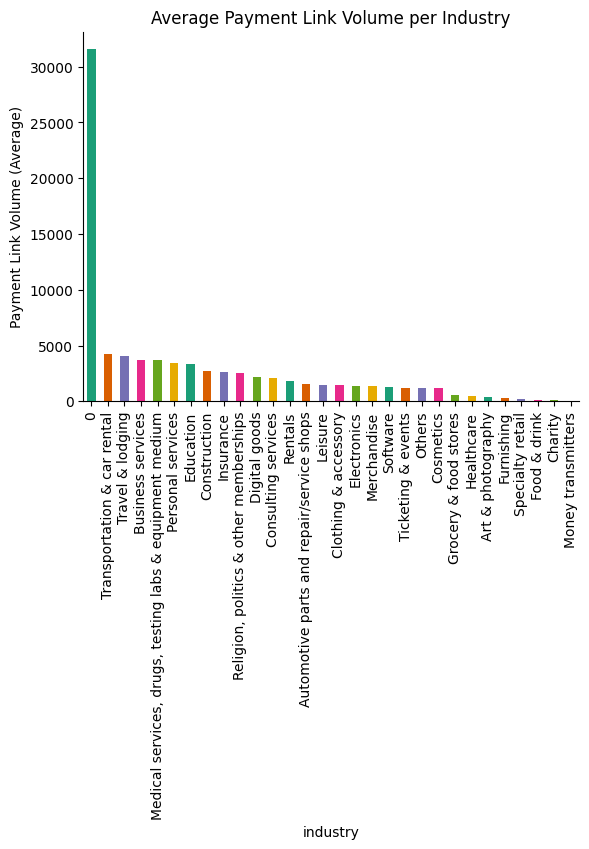

In [193]:
#Plot the payment_link_volume per industry
# Group the DataFrame by 'year_month' and sum the 'payment_link_volume' column
payment_link_volume_per_industry = merged_transaction_df.groupby('industry')['payment_link_volume'].mean()

# Sort the values by the average payment_link_volume per industry in descending order
payment_link_volume_per_industry_sorted = payment_link_volume_per_industry.sort_values(ascending=False)

# Plotting
payment_link_volume_per_industry_sorted.plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))

# Set plot labels and title
plt.xlabel('industry')
plt.ylabel('Payment Link Volume (Average)')
plt.title('Average Payment Link Volume per Industry')

plt.gca().spines[['top', 'right',]].set_visible(False);

payment_link_volume_per_industry_sorted

business_size
small     1860.314075
medium    1652.612014
large     1386.468431
Name: payment_link_volume, dtype: float64

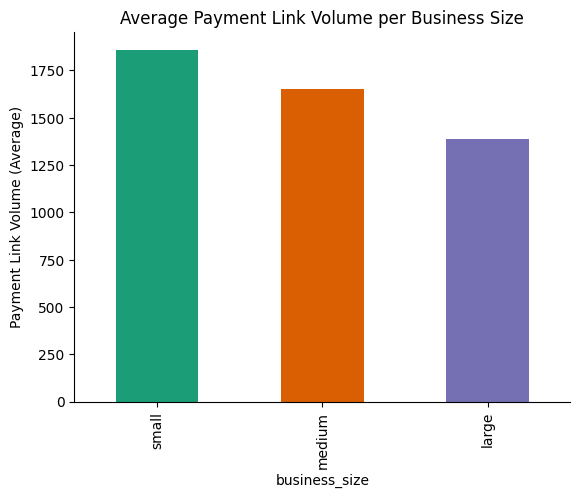

In [194]:
#Plot the payment_link_volume per business_size
# Group the DataFrame by 'year_month' and sum the 'payment_link_volume' column
payment_link_volume_per_business_size = merged_transaction_df.groupby('business_size')['payment_link_volume'].mean()

# Sort the values by the average payment_link_volume per business_size in descending order
payment_link_volume_per_business_size_sorted = payment_link_volume_per_business_size.sort_values(ascending=False)

# Plotting
payment_link_volume_per_business_size_sorted.plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))

# Set plot labels and title
plt.xlabel('business_size')
plt.ylabel('Payment Link Volume (Average)')
plt.title('Average Payment Link Volume per Business Size')

plt.gca().spines[['top', 'right',]].set_visible(False);

payment_link_volume_per_business_size_sorted

country
AE    42057.038385
HR     7563.211538
BR     7118.198709
MY     4830.064133
IN     4619.580605
PL     3929.155357
JP     3717.175476
CY     3367.192904
MX     3123.990119
IE     2608.334649
US     2122.854834
PT     2039.289050
HK     1910.045331
CA     1792.867307
IT     1779.190800
CZ     1730.879760
GB     1668.165989
SG     1650.243522
LT     1641.323247
HU     1614.571059
GR     1585.431772
RO     1358.929190
GI     1295.421053
ES     1147.457718
MT     1111.977959
FR     1042.569483
NL     1027.154430
EE      874.156944
NO      775.682660
AT      733.749450
AU      706.614997
BG      618.927747
BE      558.251630
SE      461.748705
FI      443.267455
DE      432.471792
DK      251.423328
CH      203.632635
SK      128.661690
NZ      125.909943
LV       71.320766
SI       61.321185
TH        1.500000
LU        0.391240
Name: payment_link_volume, dtype: float64

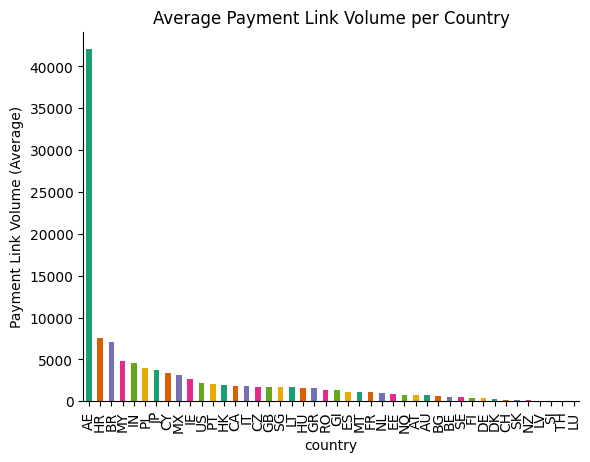

In [195]:
#Plot the payment_link_volume per country
# Group the DataFrame by 'year_month' and sum the 'payment_link_volume' column
payment_link_volume_per_country = merged_transaction_df.groupby('country')['payment_link_volume'].mean()

# Sort the values by the average payment_link_volume per country in descending order
payment_link_volume_per_country_sorted = payment_link_volume_per_country.sort_values(ascending=False)

# Plotting
payment_link_volume_per_country_sorted.plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))

# Set plot labels and title
plt.xlabel('country')
plt.ylabel('Payment Link Volume (Average)')
plt.title('Average Payment Link Volume per Country')

plt.gca().spines[['top', 'right',]].set_visible(False);

payment_link_volume_per_country_sorted

In [ ]:
#Plot the payment_link_volume per country
# Group the DataFrame by 'year_month' and sum the 'payment_link_volume' column
payment_link_volume_per_country = merged_transaction_df.groupby('country')['payment_link_volume'].mean()

# Sort the values by the average payment_link_volume per country in descending order
payment_link_volume_per_country_sorted = payment_link_volume_per_country.sort_values(ascending=False)

# Plotting
payment_link_volume_per_country_sorted.plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))

# Set plot labels and title
plt.xlabel('country')
plt.ylabel('Payment Link Volume (Average)')
plt.title('Average Payment Link Volume per Country')

plt.gca().spines[['top', 'right',]].set_visible(False);

payment_link_volume_per_country_sorted